<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/banner_IA.png"  width="1000px" height="250px">




# <center> **14. DIMENSIONAL REDUCTION** </center>



## **Outline**
1. **Why dimensional reduction?**
2. **The PCA - principal component analysis**
3. **The TSNE - (T-distributed Stochastic Neighbor Embedding)**


In [ ]:
#@title 2. LOAD LIB { display-mode: "form" }

import numpy as np
import matplotlib.pyplot as plt

#**1. Why dimensional reduction?**

Much of problems today in artificial intelligence are **High dimensional**, it is refered to input variables or features of a dataset. For instance an image, an audio, a text file... How many features have this applications?.

Hence, dimensionality reduction is a technique to reduce the number of input variables **but** preserving the structure of data. This reduction result useful to explain ML decisions, to operate without redundancy in information, and for introduce new alternatives in non-supervised schemes.


A beutiful examples can be observed [here](https://projector.tensorflow.org/)


<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/data-struc.jpg" alt="Drawing" style="width:1000px;">


#**2. The PCA - Principal Component Analysis**

**Which features better represent the fish?**

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/-/raw/master/imgs/PCA.png" style="width:700px;">

It is the most known straetegy for dimensional reduction that exploit correlations among features.

- Find the directiosn with maximun variance and project data over this new axis.   
- The axes are orthogonal(we have number of axis as number of features).
- Then, we can represent data with a reduced set of axis, i.e., principal components.
- If $\mathbf{X}$ is a matrix of features (zero mean), then we compute the covariance matrix, as: $\mathbf{X.X^{T}}$
- So, we compute a decomposition:  $\mathbf{X.X^{T}} = \mathbf{D⋁D^T}$
  - $D$ are eigenvectors
  - $⋁$ are eigenvalues

In [ ]:
#@title **code**  Working with Breast cancer dataset.
breast_feature1 = 9 # @ param {type:"integer"}
breast_feature2 = 11 # @ param {type:"integer"}

from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA

breast = load_breast_cancer()
X = breast.data
y = breast.target
print('X shape: ', X.shape, 'y shape: ', y.shape)
print(breast.target_names)
pca_breast = PCA(n_components= 2, whiten=True)
X_pca = pca_breast.fit_transform(X)
print('X: ', X.shape, ' X_pca: ', X_pca.shape)
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.scatter(X[:,breast_feature1],X[:,breast_feature2],c=y, alpha=0.4)
plt.xlabel(breast.feature_names[breast_feature1]); plt.ylabel(breast.feature_names[breast_feature2]);
plt.subplot(122)
plt.scatter(X_pca[:,0],X_pca[:,1],c=y, alpha=0.4)
plt.xlabel("PC 1"); plt.ylabel("PC 2")

X shape:  (569, 30) y shape:  (569,)
['malignant' 'benign']
X:  (569, 30)  X_pca:  (569, 2)


Text(0, 0.5, 'PC 2')

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

- What about the reduction and visualization of **three** components?  

(569, 3) (569, 30)


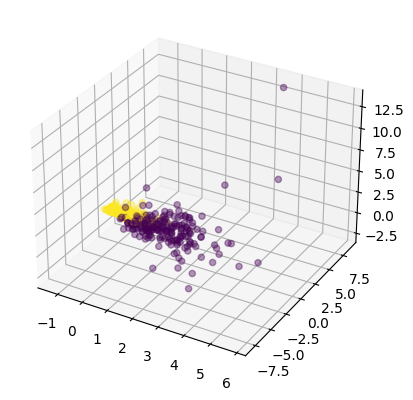

In [ ]:
pca_breast = PCA(n_components= 3, whiten=True)
X_pca = pca_breast.fit_transform(X)
print(X_pca.shape, X.shape)

ax = plt.axes(projection="3d")
ax.scatter3D(X_pca[:,0],X_pca[:,1],X_pca[:,2],c=y, alpha=0.4)

In [ ]:
#@title **code**  Classification from few components
Components = 4 #@param {type:"integer"}

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import *

breast = load_breast_cancer()
X = breast.data
y = breast.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.7, random_state=42)

est = GaussianNB(); est.fit(X_train, y_train)
y_est = est.predict(X_test)
print("X test", X_test.shape)
print(accuracy_score(y_test, y_est))

pca_breast = PCA(n_components= Components, whiten=True)
pca_breast.fit(X_train)
X_pca_train = pca_breast.transform(X_train)
X_pca_test = pca_breast.transform(X_test)

est = GaussianNB(); est.fit(X_pca_train, y_train)
y_est = est.predict(X_pca_test)
print('X_test', X_pca_test.shape)
print(accuracy_score(y_test, y_est))



X test (399, 30)
0.9323308270676691
X_test (399, 4)
0.9423558897243107


In [ ]:
#@title **code**  Working with data with larger dimensions: the Labeled faces
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
n_samples, h, w = lfw_people.images.shape
X = lfw_people.data
y = lfw_people.target
print('X: ', X.shape, ' y:', y.shape)
class_names = lfw_people.target_names

n_classes = lfw_people.target_names.shape[0]
classes_num = list(range(class_names.shape[0]))
print('num classes: ', class_names.shape[0])
print('num imgs: ', n_samples,'height:', h, 'width:', w)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
plt.figure(figsize=(15,10))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[i].reshape(h,w), cmap=plt.cm.gray)
    plt.xlabel(class_names[y[i]])


X:  (1288, 1850)  y: (1288,)
num classes:  7
num imgs:  1288 height: 50 width: 37
(966, 1850) (322, 1850) (966,) (322,)


In [ ]:
#@title **code**  Classification from few components
Components = 50 #@param {type:"integer"}

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import *

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
X = lfw_people.data
y = lfw_people.target
print(X.shape, Components)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

est = GaussianNB(); est.fit(X_train, y_train)
y_est = est.predict(X_test)
print("X test", X_test.shape)
print(accuracy_score(y_test, y_est))

pca_people = PCA(n_components= Components, whiten=True)
pca_people.fit(X_train)
X_pca_train = pca_people.transform(X_train)
X_pca_test = pca_people.transform(X_test)

est = GaussianNB(); est.fit(X_pca_train, y_train)
y_est = est.predict(X_pca_test)
print('X_test', X_pca_test.shape)
print(accuracy_score(y_test, y_est))

(1288, 1850) 50
X test (322, 1850)
0.38509316770186336
X_test (322, 50)
0.7422360248447205


The dimensional reduction is better but no so good!

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

- Try with random Forest (raw and PCA data)
- Try with a DNN

(1288, 1850) 350


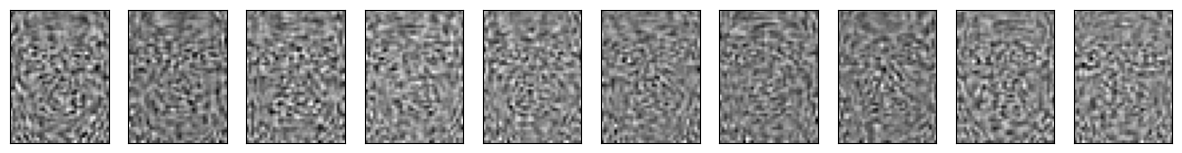

In [ ]:
#@title **code** Exploring **Eigen faces**
#@markdown a method to compress images

Components = 350 #@param {type:"integer"}
cont = 300#@param {type:"integer"}

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
X = lfw_people.data
y = lfw_people.target
print(X.shape, Components)
pca_people = PCA(n_components= Components, whiten=True)
pca_people.fit(X_train)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.7, random_state=42)

eigenfaces = pca_people.components_.reshape((Components, h, w))
plt.figure(figsize=(15,10))

for i in range(10):
    plt.subplot(1,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(eigenfaces[i+cont].reshape(h,w), cmap=plt.cm.gray)

In [ ]:
#@title **code** visualizing PCA with only two components is not sufficient
n_components = 2 # @param {type:"integer"}

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
X = lfw_people.data
y = lfw_people.target
print(X.shape, Components)
pca_people = PCA(n_components= Components, whiten=True)
pca_people.fit(X_train)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.7, random_state=42)

X_pca = pca_people.fit_transform(X)
print('X: ', X.shape, ' X_pca: ', X_pca.shape)
plt.scatter(X_pca[:,0],X_pca[:,1],c=y, alpha=0.4)


(1288, 1850) 350
X:  (1288, 1850)  X_pca:  (1288, 350)


#**3. The TSNE - (T-distributed Stochastic Neighbor Embedding)**


t-SNE (TSNE) converts affinities of data points to probabilities. The affinities in the original space are represented by Gaussian joint probabilities and the affinities in the embedded space are represented by Student’s t-distributions.
The Kullback-Leibler (KL) divergence of the joint probabilities in the original space and the embedded space will be minimized by gradient descent

- Revealing the structure at many scales on a single map
- The similarity between ($x_i, x_j$) is the conditional probability that $x_i$ select $x_j$ as the neighboorhood under a Gaussian probability centered in $x_i$
- The t-sne try to reproduce the distribution of the original space in the low-dimensional space.




In [ ]:
#@title **code**  Working with Breast cancer dataset.
breast_feature1 = 9 # @ param {type:"integer"}
breast_feature2 = 11 # @ param {type:"integer"}

from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


breast = load_breast_cancer()
X = breast.data
y = breast.target
print('X shape: ', X.shape, 'y shape: ', y.shape)
print(breast.target_names)


pca_breast = PCA(n_components= 2, whiten=True)
X_pca = pca_breast.fit_transform(X)
print('X: ', X.shape, ' X_pca: ', X_pca.shape)

tsne_breast = TSNE(n_components=2, learning_rate='auto')
X_tsne = tsne_breast.fit_transform(X)

plt.figure(figsize=(15,5))
plt.subplot(131)
plt.scatter(X[:,breast_feature1],X[:,breast_feature2],c=y, alpha=0.4)
plt.xlabel(breast.feature_names[breast_feature1]); plt.ylabel(breast.feature_names[breast_feature2]);
plt.subplot(132)
plt.scatter(X_pca[:,0],X_pca[:,1],c=y, alpha=0.4)
plt.xlabel("PC 1"); plt.ylabel("PC 2")
plt.subplot(133)
plt.scatter(X_tsne[:,0],X_tsne[:,1],c=y, alpha=0.4)
plt.xlabel("tsne 1"); plt.ylabel("tsne 2")

X shape:  (569, 30) y shape:  (569,)
['malignant' 'benign']
X:  (569, 30)  X_pca:  (569, 2)


Text(0, 0.5, 'tsne 2')

In [ ]:
n_components = 2 # @param {type:"integer"}
perplexity_n = 3 # @param {type:"integer"}


lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
X = lfw_people.data
y = lfw_people.target
print(X.shape, Components)
pca_people = PCA(n_components= Components, whiten=True)
pca_people.fit(X)
X_pca = pca_people.transform(X)

tsne_breast = TSNE(n_components=2,perplexity =perplexity_n)
X_tsne = tsne_breast.fit_transform(X)


pca_to_tsne = PCA(n_components= 100).fit_transform(X)
tsne_pca = TSNE(n_components=2,perplexity =perplexity_n).fit_transform(pca_to_tsne)

plt.figure(figsize=(15,5))
plt.subplot(131)
plt.scatter(X_pca[:,0],X_pca[:,1],c=y, alpha=0.4)
plt.xlabel("PC 1"); plt.ylabel("PC 2")
plt.subplot(132)
plt.scatter(X_tsne[:,0],X_tsne[:,1],c=y, alpha=0.4)
plt.xlabel("tsne 1"); plt.ylabel("tsne 2")
plt.subplot(133)
plt.scatter(tsne_pca[:,0],tsne_pca[:,1],c=y, alpha=0.4)
plt.xlabel("tsne 1"); plt.ylabel("tsne 2")

(1288, 1850) 350


Text(0, 0.5, 'tsne 2')

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

- Try with _perplexity_, _early_exaggeration_, and _learning rate_. Which means such features?

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

- What about the reduction and visualization of **three** components?
- Visualize _Fashion-MNIST dataset_ using two and three components.

References

https://interactivechaos.com/es/manual/tutorial-de-machine-learning/t-sne

https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html#sphx-glr-auto-examples-manifold-plot-lle-digits-py

